In [284]:
import pandas as pd
df_PNL_2021 = pd.read_csv("/Users/pallaviprakash/Desktop/Fall 22 sem 3/Algorithm microstructure/SMA_OUTPUT/group_05_project-ss/output/SMA/20210101_20211231/BACK_Test3Group5Strategy_2022-12-17_110119_start_01-01-2021_end_12-31-2021_pnl.csv")

In [285]:
df_PNL_2021.head()

Name                         Time  Cumulative PnL
0  Test3Group5Strategy  2021-Jan-04 14:30:15.146496        0.000000
1  Test3Group5Strategy  2021-Jan-04 14:31:15.297556     -492.799798
2  Test3Group5Strategy  2021-Jan-04 14:32:15.704200     -606.402710
3  Test3Group5Strategy  2021-Jan-04 14:33:16.037879     -708.919866
4  Test3Group5Strategy  2021-Jan-04 14:34:16.387624     -708.919866

In [286]:
df_PNL_2021["Cumulative PnL"].tail()

118822    1.924113e+08
118823    1.924113e+08
118824    1.924113e+08
118825    1.924113e+08
118826    1.924113e+08
Name: Cumulative PnL, dtype: float64

In [287]:
df_PNL_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118827 entries, 0 to 118826
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Name            118827 non-null  object 
 1   Time            118827 non-null  object 
 2   Cumulative PnL  118827 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.7+ MB


In [288]:
Net_PNL = df_PNL_2021['Cumulative PnL']
Cummulative_PNL = Net_PNL.iloc[-1]

In [289]:
df_PNL_2021 = df_PNL_2021.set_index(df_PNL["Time"])


In [290]:
intial_value = 1000000

In [291]:
df_PNL_2021['Cum_PNL_percent'] = df_PNL_2021['Cumulative PnL']/intial_value

In [292]:
df_PNL_2021.head()

Name                         Time  \
Time                                                                            
2021-Jan-04 14:30:15.146496  Test3Group5Strategy  2021-Jan-04 14:30:15.146496   
2021-Jan-04 14:31:15.297556  Test3Group5Strategy  2021-Jan-04 14:31:15.297556   
2021-Jan-04 14:32:15.704200  Test3Group5Strategy  2021-Jan-04 14:32:15.704200   
2021-Jan-04 14:33:16.037879  Test3Group5Strategy  2021-Jan-04 14:33:16.037879   
2021-Jan-04 14:34:16.387624  Test3Group5Strategy  2021-Jan-04 14:34:16.387624   

                             Cumulative PnL  Cum_PNL_percent  
Time                                                          
2021-Jan-04 14:30:15.146496        0.000000         0.000000  
2021-Jan-04 14:31:15.297556     -492.799798        -0.000493  
2021-Jan-04 14:32:15.704200     -606.402710        -0.000606  
2021-Jan-04 14:33:16.037879     -708.919866        -0.000709  
2021-Jan-04 14:34:16.387624     -708.919866        -0.000709

In [293]:
df_PNL_2021["daily_PNL"] = df_PNL_2021['Cumulative PnL'].diff()

In [294]:
import numpy as np
pnl_std = np.std(df_PNL_2021['Cum_PNL_percent'] )
pnl_std

58.65760583006831

In [299]:

df_PNL_2021['Time'] = pd.to_datetime(df_PNL_2021['Time']) #changing the type of collection_time to date_time
df_PNL_2021['date'] = pd.to_datetime(df_PNL_2021['Time']).dt.date # generating date from collection time
df_PNL_2021['date'] = pd.to_datetime(df_PNL_2021['date'])# converting date to datetime
df_PNL_2021["Cum_PNL_percent"]= df_PNL_2021['Cumulative PnL']/initial_value*100
Cummulative_PNL = df_PNL_2021['Cumulative PnL'].iloc[-1]
df_PNL_2021["daily_PNL"] = df_PNL_2021['Cumulative PnL'].diff()
pnl_std = np.std(df_PNL_2021['Cum_PNL_percent'] )
# Sharpe Ratio = (Expected Return - Risk free rate)/ std_deviation of portfolio excessive rate
sharpe_ratio = df_PNL_2021['Cum_PNL_percent'].iloc[-1]/ pnl_std
print(f"sharpe ratio: {round(sharpe_ratio, 4)}")
#Sortino ratio = (Expected Return - Risk free rate)/ Standard deviation of downside risk
pnl_std_downside = np.std(df_PNL_2021.Cum_PNL_percent[df_PNL_2021['Cum_PNL_percent']<0])
#print(pnl_std_downside)
Sortino_ratio = df_PNL_2021['Cum_PNL_percent'].iloc[-1]/ pnl_std_downside 
print(f"Sortino ratio: {round(Sortino_ratio , 4)}")
Max_PNL = np.max(df_PNL_2021["daily_PNL"])
Min_PNL = np.min(df_PNL_2021["daily_PNL"])
max_drowndown = (Min_PNL - Max_PNL) / (initial_value + Max_PNL)
print(f"max drawdown: {round(max_drowndown, 4)}%")
print(f"max profit: {round(Max_PNL, 4)}") 
print(f"min profit: {round(Min_PNL, 4)}") 
print(f"Total Cummulative Profit: {round(Cummulative_PNL, 4)}")     

sharpe ratio: 3.2802
Sortino ratio: 35.2323
max drawdown: -1.9299%
max profit: 189510380.66
min profit: -178152756.68
Total Cummulative Profit: 192411296.1059


In [302]:
df_PNL_2021.head()

Name                       Time  \
Time                                                                          
2021-Jan-04 14:30:15.146496  Test3Group5Strategy 2021-01-04 14:30:15.146496   
2021-Jan-04 14:31:15.297556  Test3Group5Strategy 2021-01-04 14:31:15.297556   
2021-Jan-04 14:32:15.704200  Test3Group5Strategy 2021-01-04 14:32:15.704200   
2021-Jan-04 14:33:16.037879  Test3Group5Strategy 2021-01-04 14:33:16.037879   
2021-Jan-04 14:34:16.387624  Test3Group5Strategy 2021-01-04 14:34:16.387624   

                             Cumulative PnL  Cum_PNL_percent   daily_PNL  \
Time                                                                       
2021-Jan-04 14:30:15.146496        0.000000         0.000000         NaN   
2021-Jan-04 14:31:15.297556     -492.799798        -0.049280 -492.799798   
2021-Jan-04 14:32:15.704200     -606.402710        -0.060640 -113.602912   
2021-Jan-04 14:33:16.037879     -708.919866        -0.070892 -102.517156   
2021-Jan-04 14:34:16.387624     -708.919866        -0.070892    0.000000   

                                  date  
Time                                    
2021-Jan-04 14:30:15.146496 2021-01-04  
2021-Jan-04 14:31:15.297556 2021-01-04  
2021-Jan-04 14:32:15.704200 2021-01-04  
2021-Jan-04 14:33:16.037879 2021-01-04  
2021-Jan-04 14:34:16.387624 2021-01-04

In [303]:
df_PNL_2021_sample = df_PNL_2021[df_PNL_2021['date'] <='2021-01-08']
df_PNL_2021_sample = df_PNL_2021_sample.set_index('Time')

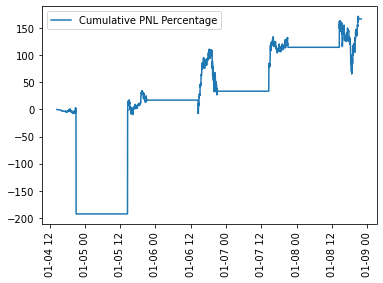

In [304]:
import matplotlib.pyplot as plt
plt.plot(df_PNL_2021_sample['Cum_PNL_percent'],label = "Cumulative PNL Percentage")
plt.xticks(rotation = 90)
plt.legend()

plt.show()

In [305]:
df_PNL_2022 = pd.read_csv("/Users/pallaviprakash/Desktop/Fall 22 sem 3/Algorithm microstructure/report/lstm_ouput/group_05_project-ss/output/SMA/20220101_20221202/BACK_Test3Group5Strategy_2022-12-17_012607_start_01-01-2022_end_12-02-2022_pnl.csv")

In [306]:
df_PNL_2022['Time'] = pd.to_datetime(df_PNL_2022['Time']) #changing the type of collection_time to date_time
df_PNL_2022['date'] = pd.to_datetime(df_PNL_2022['Time']).dt.date # generating date from collection time
df_PNL_2022['date'] = pd.to_datetime(df_PNL_2022['date'])# converting date to datetime
df_PNL_2022["Cum_PNL_percent"]= df_PNL_2022['Cumulative PnL']/initial_value*100
Cummulative_PNL = df_PNL_2022['Cumulative PnL'].iloc[-1]
df_PNL_2022["daily_PNL"] = df_PNL_2022['Cumulative PnL'].diff()
pnl_std = np.std(df_PNL_2022['Cum_PNL_percent'] )
# Sharpe Ratio = (Expected Return - Risk free rate)/ std_deviation of portfolio excessive rate
sharpe_ratio = df_PNL_2022['Cum_PNL_percent'].iloc[-1]/ pnl_std
print(f"sharpe ratio: {round(sharpe_ratio, 4)}")
#Sortino ratio = (Expected Return - Risk free rate)/ Standard deviation of downside risk
pnl_std_downside = np.std(df_PNL_2022.Cum_PNL_percent[df_PNL_2022['Cum_PNL_percent']<0])
#print(pnl_std_downside)
Sortino_ratio = df_PNL_2022['Cum_PNL_percent'].iloc[-1]/ pnl_std_downside 
print(f"Sortino ratio: {round(Sortino_ratio , 4)}")
Max_PNL = np.max(df_PNL_2022["daily_PNL"])
Min_PNL = np.min(df_PNL_2022["daily_PNL"])
max_drowndown = (Min_PNL - Max_PNL) / (initial_value + Max_PNL)
print(f"max drawdown: {round(max_drowndown, 4)}%")
print(f"max profit: {round(Max_PNL, 4)}") 
print(f"min profit: {round(Min_PNL, 4)}") 
print(f"Total Cummulative Profit: {round(Cummulative_PNL, 4)}")   

sharpe ratio: -3.1548
Sortino ratio: -3.1845
max drawdown: -2.0346%
max profit: 34604375.8148
min profit: -37837631.3806
Total Cummulative Profit: -131377007.3707


In [307]:
pnl_std = np.std(df_PNL_2022['Cum_PNL_percent'] )
pnl_std

4164.414626263575

In [308]:
pnl_std_downside = np.std(df_PNL_2022.Cum_PNL_percent[df_PNL_2022['Cum_PNL_percent']<0])
pnl_std_downside 

4125.473999473231

In [309]:
df_PNL_2022.Cum_PNL_percent[df_PNL_2022['Cum_PNL_percent']<0]

54          -0.017575
55          -0.091156
57          -0.258593
58          -0.496556
59          -0.437888
             ...     
97057   -13137.700737
97058   -13137.700737
97059   -13137.700737
97060   -13137.700737
97061   -13137.700737
Name: Cum_PNL_percent, Length: 92804, dtype: float64

In [310]:
df_PNL_2022.tail()

Name                       Time  Cumulative PnL  \
97057  Test3Group5Strategy 2022-12-02 21:45:04.146164   -1.313770e+08   
97058  Test3Group5Strategy 2022-12-02 21:46:14.923075   -1.313770e+08   
97059  Test3Group5Strategy 2022-12-02 21:47:36.943996   -1.313770e+08   
97060  Test3Group5Strategy 2022-12-02 21:48:48.975870   -1.313770e+08   
97061  Test3Group5Strategy 2022-12-03 05:00:00.000000   -1.313770e+08   

            date  Cum_PNL_percent  daily_PNL  
97057 2022-12-02    -13137.700737        0.0  
97058 2022-12-02    -13137.700737        0.0  
97059 2022-12-02    -13137.700737        0.0  
97060 2022-12-02    -13137.700737        0.0  
97061 2022-12-03    -13137.700737        0.0

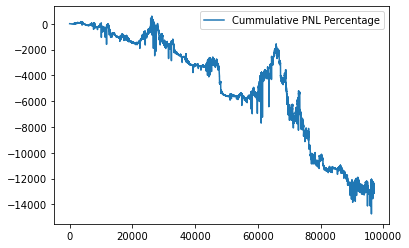

In [311]:
import matplotlib.pyplot as plt

plt.plot(df_PNL_2022['Cum_PNL_percent'],label = "Cummulative PNL Percentage")
plt.legend()
plt.show()